# [TEMPLATE] DATASET DEPURADO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [4]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [5]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'
otro = '#FAEFBF'

<hr>

# Analisis de las diferentes distribuciones de las variables

In [6]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [7]:
df = df[['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
         'metroscubiertos', 'metrostotales', 'fecha', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
         'centroscomercialescercanos', 'precio']]

### Distribucion segun tipo de propiedad

In [8]:
p2 = df.copy()
p2 = p2[['tipodepropiedad']]
conservar = ['Casa', 'Apartamento', 'Casa en condominio', 'Terreno', 'Edificio', 'Local Comercial', 'Oficina comercial']
p2['tipodepropiedad'] = p2['tipodepropiedad'].map(lambda x: x if x in conservar else 'Otros')
p2 = p2['tipodepropiedad'].value_counts(normalize=True).map(lambda x: round(x*100)).to_frame()\
    .reset_index().rename(columns={'index':'tipodepropiedad','tipodepropiedad':'porcentual'})

In [9]:
p2['label'] = p2['tipodepropiedad'] + " "
p2['label'] += "(" + p2['porcentual'].map(lambda x: str(x)) + "%)"

In [10]:
p2

,tipodepropiedad,porcentual,label
0,Casa,59,Casa (59%)
1,Apartamento,24,Apartamento (24%)
2,Casa en condominio,8,Casa en condominio (8%)
3,Terreno,4,Terreno (4%)
4,Otros,2,Otros (2%)
5,Local Comercial,1,Local Comercial (1%)
6,Oficina comercial,1,Oficina comercial (1%)
7,Edificio,1,Edificio (1%)


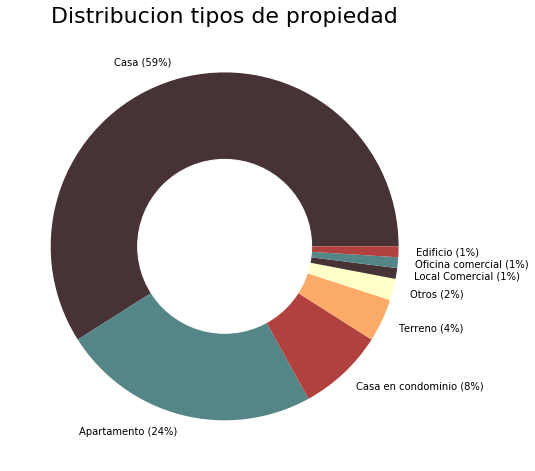

In [11]:
plt.figure(figsize=(8,8))


my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.title('Distribucion tipos de propiedad', fontsize=22)
plt.pie(p2['porcentual'], labels=p2['label'], colors=[marron, azul, rojo, amarillo, verde])
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig('distribucion tipos propiedad.png', transparent=True, bbox_inches='tight')


<hr>

### Distribuciones segun atributos

In [12]:
p1 = df.copy()
p1 = p1[['garages', 'gimnasio', 'piscina', 'usosmultiples', 'escuelascercanas', 'centroscomercialescercanos']]
p1.head()

,garages,gimnasio,piscina,usosmultiples,escuelascercanas,centroscomercialescercanos
0,1,False,False,False,False,False
1,2,False,False,False,True,True
2,2,False,False,False,False,False
3,1,False,False,False,True,True
4,1,False,False,False,False,False


In [13]:
# Veo los nulos
(p1['garages'] == -1).value_counts()

False    202235
True      37765
Name: garages, dtype: int64

In [14]:
garages = p1.copy()
garages = garages.loc[garages['garages'] != -1]['garages']
garages = garages.map(lambda x: True if (x>=1) else False).value_counts(normalize=True).map(lambda x: round(x*100))
garages.index = ['Tiene', 'No tiene']
garages

Tiene       87
No tiene    13
Name: garages, dtype: int64

In [15]:
gimnasios= p1['gimnasio'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
piscinas= p1['piscina'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
sums=p1['usosmultiples'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
escuelas=p1['escuelascercanas'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
comerciales=p1['centroscomercialescercanos'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))

In [16]:
si = 'Tiene'
no = 'No tiene'

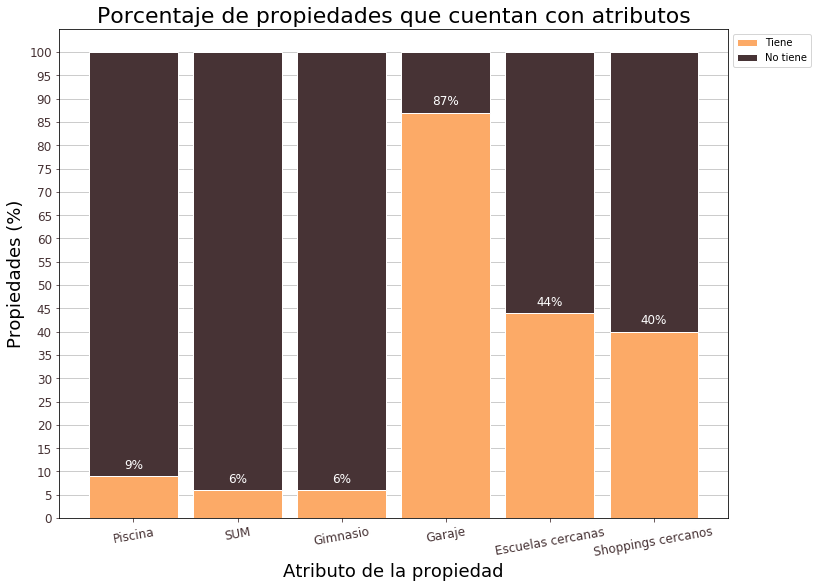

In [17]:
from matplotlib import rc

tiene = [piscinas[si], sums[si], gimnasios[si], garages[si], escuelas[si], comerciales[si]] 
no_tiene = [piscinas[no], sums[no], gimnasios[no], garages[no], escuelas[no], comerciales[no]]

 
# config
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')

# Data
r = [0,1,2,3,4,5]
raw_data = {'pTiene': tiene, 'pNoTiene': no_tiene}
data = pd.DataFrame(raw_data)
names = ('Piscina', 'SUM', 'Gimnasio', 'Garaje', 'Escuelas cercanas', 'Shoppings cercanos')

# plot
barWidth = 0.85
lol = plt.bar(r, data['pTiene'], color=amarillo, edgecolor='white', width=barWidth, label="Tiene")
plt.bar(r, data['pNoTiene'], bottom=data['pTiene'], color=marron, edgecolor='white', width=barWidth, label="No tiene")

plt.xlabel("Atributo de la propiedad", fontsize=18)
plt.ylabel("Propiedades (%)", fontsize=18)
plt.xticks(r, names, rotation=10)
plt.yticks(np.arange(0, 105, step=5))
plt.title('Porcentaje de propiedades que cuentan con atributos',fontsize=22)

plt.grid(axis='y')
plt.tick_params(colors=marron, grid_alpha=0.8, labelsize=12)

# Make some labels.
rects= lol.patches

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height)+'%', ha='center', va='bottom',
            color='white', size=12)    
    
    
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.savefig("atributos porcentuales.png", transparent=True, bbox_inches='tight')




### Distribucion metros cubiertos vs metros totales

In [18]:
p3 = df.copy()
p3 = p3[['tipodepropiedad', 'metroscubiertos', 'metrostotales']]
p3 = p3.loc[(p3['metrostotales'] != -1) & (p3['metroscubiertos'] != -1) & (p3['metrostotales']>p3['metroscubiertos'])]

In [19]:
p3.shape

(62954, 3)

In [20]:
p3['metrosdescubiertos'] = p3['metrostotales'] - p3['metroscubiertos']


In [21]:
p3['metroscubiertos'] = (p3['metroscubiertos'] / p3['metrostotales'])*100
p3['metrosdescubiertos'] = (p3['metrosdescubiertos'] / p3['metrostotales'])*100

In [22]:
p3.head()

,tipodepropiedad,metroscubiertos,metrostotales,metrosdescubiertos
2,Casa,86.746988,166,13.253012
3,Casa,94.029851,67,5.970149
5,Apartamento,83.333333,90,16.666667
6,Casa,87.500000,160,12.500000
15,Casa,72.000000,250,28.000000


In [23]:
p3['tipodepropiedad'] = p3['tipodepropiedad'].map(lambda x: x if x in ['Casa', 'Apartamento'] else 'Otros')

In [24]:
p3 = p3.groupby('tipodepropiedad').agg({'metroscubiertos':'mean', 'metrosdescubiertos':'mean'})\
        .applymap(lambda x: round(x))

In [25]:
p3

,metroscubiertos,metrosdescubiertos
tipodepropiedad,,
Apartamento,79,21
Casa,74,26
Otros,74,26


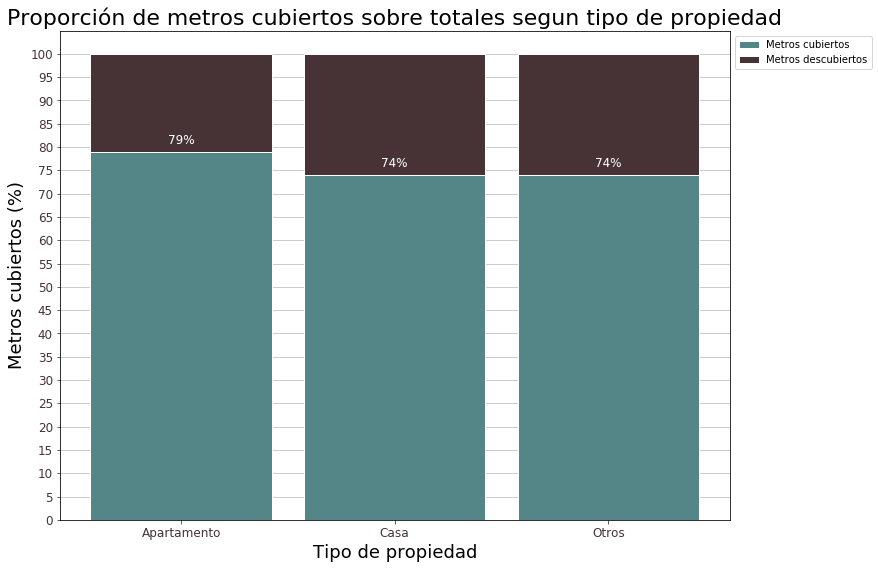

In [30]:

cubiertos= p3['metroscubiertos']
descubiertos=p3['metrosdescubiertos']
 
# config
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')

# Data
r = [0,1,2]
raw_data = {'cubiertos': cubiertos, 'descubiertos': descubiertos}
data = pd.DataFrame(raw_data)
names = ('Apartamento', 'Casa', 'Otros')

# plot
barWidth = 0.85
lol = plt.bar(r, data['cubiertos'], color=azul, edgecolor='white', width=barWidth, label="Metros cubiertos")
plt.bar(r, data['descubiertos'], bottom=data['cubiertos'], color=marron, edgecolor='white', width=barWidth, label="Metros descubiertos")

plt.xlabel("Tipo de propiedad", fontsize=18)
plt.ylabel("Metros cubiertos (%)", fontsize=18)
plt.xticks(r, names, rotation=0)
plt.yticks(np.arange(0, 105, step=5))
plt.title('Proporción de metros cubiertos sobre totales segun tipo de propiedad',fontsize=22)

plt.grid(axis='y')
plt.tick_params(colors=marron, grid_alpha=0.8, labelsize=12)

# Make some labels.
rects = lol.patches

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height)+'%', ha='center', va='bottom',
            color='white', size=12)
    
    
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.savefig("metros cubiertos porcentuales.png", transparent=True, bbox_inches='tight')




<hr>

### Antiguedad

In [31]:
# funcion aux

def parsear_antiguedad_1(anti):
    div5 = anti//5
    if (anti==0):
        return 'A'
        #return 'A estrenar'
    if (div5==0):
        return 'B'
        #return 'Menos de 5'
    elif (div5<10):
        return ('C{}'.format(div5))
        #return ('Entre {} y {}'.format((div5*5),((div5+1)*5)))
    else:
        return 'D'
        #return '50 o más'
    
def parsear_antiguedad_2(anti):
    if (anti=='A'):
        return 'A estrenar'
    elif (anti=='B'):
        return 'Menos de 5'
    elif (anti[0]=='C'):
        div5=int(anti[1])
        return ('Entre {} y {}'.format((div5*5),((div5+1)*5)))
    else:
        return '50 o más'
        

In [32]:
p4 = df.copy()
p4 = p4.loc[p4['antiguedad'] != -1][['antiguedad']]
p4 = p4['antiguedad'].value_counts()

In [33]:
p4.index = p4.index.map(parsear_antiguedad_1)
p4 = p4.to_frame().reset_index().rename(columns={'index':'antiguedad', 'antiguedad':'cantidad'})

In [34]:
p4=p4.groupby('antiguedad').sum().reset_index()

In [35]:
p4['antiguedad'] = p4['antiguedad'].map(parsear_antiguedad_2)

In [36]:
p4['porcentual'] = p4['cantidad'].map(lambda x: (x/(p4['cantidad'].sum()))*100)
p4['label'] = p4['porcentual'].map(lambda x: '<1%' if (int(x)==0) else str(int(x))+'%')

In [37]:
p4

,antiguedad,cantidad,porcentual,label
0,A estrenar,50335,25.622948,25%
1,Menos de 5,30972,15.766245,15%
2,Entre 5 y 10,41966,21.362722,21%
3,Entre 10 y 15,32963,16.779760,16%
4,Entre 15 y 20,6413,3.264527,3%
5,Entre 20 y 25,21669,11.030568,11%
6,Entre 25 y 30,3577,1.820866,1%
7,Entre 30 y 35,3634,1.849882,1%
8,Entre 35 y 40,1330,0.677034,<1%
9,Entre 40 y 45,1519,0.773244,<1%


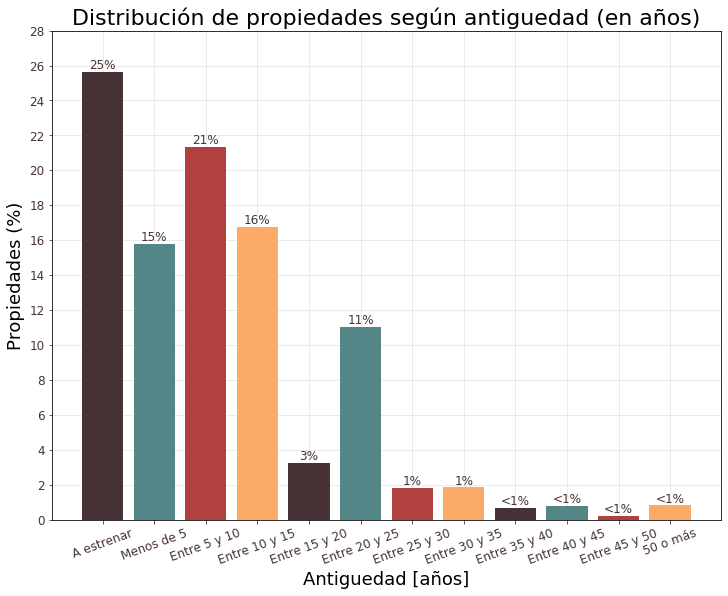

In [38]:
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')

# plot
ja = plt.bar(x=p4['antiguedad'], height=p4['porcentual'], color=[marron, azul, rojo, amarillo])

plt.title('Distribución de propiedades según antiguedad (en años)', fontsize=22)
plt.xlabel("Antiguedad [años]", fontsize=18)
plt.ylabel("Propiedades (%)", fontsize=18)
plt.xticks(rotation=20)
plt.yticks(np.arange(0, 30, step=2))

plt.grid(axis='both')
plt.tick_params(colors=marron, grid_alpha=0.3, labelsize=12)



# Make some labels.
rectss = ja.patches

i=0
for rect in rectss:
    height = rect.get_height()
    labell = p4['label'][i]
    i += 1
    plt.text(rect.get_x() + rect.get_width() / 2, height, labell, ha='center', va='bottom',
            color=marron, size=12)
    

plt.savefig("antiguedad.png", transparent=True, bbox_inches='tight')




<hr>

### Cantidad de habitaciones

In [39]:
p5 = df.copy()
p5 = p5.loc[p5['habitaciones'] != -1]
p5 = p5['habitaciones'].value_counts().to_frame().reset_index().rename(columns={'index':'habitaciones', 'habitaciones':'cantidad'})

In [40]:
p5['habitaciones'] = p5['habitaciones'].map(lambda x: str(x) if x < 5 else '5 o más')

In [41]:
p5 = p5.groupby('habitaciones').sum().reset_index()

In [42]:
p5['porcentual'] = p5['cantidad'].map(lambda x: int((x/(p5['cantidad'].sum()))*100))

In [43]:
p5

,habitaciones,cantidad,porcentual
0,1,5069,2
1,2,57808,26
2,3,121887,56
3,4,25068,11
4,5 o más,7697,3


In [44]:
p5['label'] = p5['habitaciones'] + " "
p5['label'] += "(" + p5['porcentual'].map(lambda x: str(x)) + "%)"

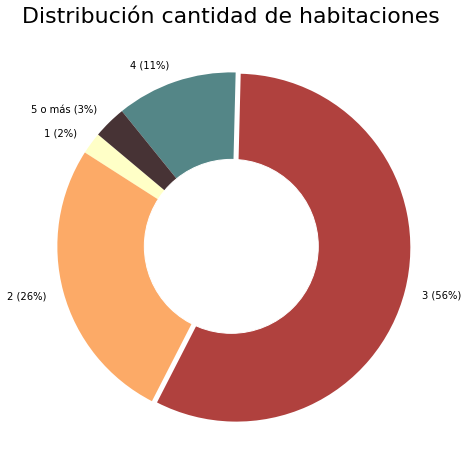

In [45]:
plt.figure(figsize=(8,8))

my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.title('Distribución cantidad de habitaciones', fontsize=22)
plt.pie(p5['porcentual'], labels=p5['label'], colors=[verde, amarillo, rojo, azul, marron],
        explode=(0, 0, 0.03, 0, 0), startangle=140)

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig('distribucion cantidad habitaciones.png', transparent=True, bbox_inches='tight')
